<a href="https://colab.research.google.com/github/houpingx/DataManagement/blob/main/Use_selenium_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Selenium on Google Colab
In the colab, you don't need to manually download the chromedriver. Use the the following code:
!apt install chromium-chromedriver

it will automatically download the chrome driver

In [30]:
!apt update
!apt install chromium-chromedriver
!pip install selenium

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Building dependency tree       
Reading state infor

# Import needed packages
the time package is used to control the timing

In [31]:
import os
import re
import time
import csv
import json
import random
import requests
import pandas as pd
import numpy as np

from datetime import date, timedelta, datetime

# import Selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.glassdoor.com/member/home/index.htm")
print(wd.page_source)  # results

## use your own username and password

In [6]:
username = 'your_username'
password = 'your_password'

## sign up & fill in username
find the username box and fill in your username

In [7]:
email_field = wd.find_element(By.NAME,'username')
email_field.send_keys(username)
time.sleep(1)
submit_btn = wd.find_element(By.XPATH,'//button[@type="submit"]')
submit_btn.click()


## sign up & fill in password
find the password box and fill in your password

In [10]:
password_field = wd.find_element(By.NAME,'password')
password_field.send_keys(password)
time.sleep(1)
submit_btn = wd.find_element(By.XPATH,'//button[@type="submit"]')
submit_btn.click()

SyntaxError: ignored

# Scrap data from glassdoor
use the chrome driver to get the content from the url

In [14]:
# url = 'https://www.glassdoor.com/Overview/Working-at-ADC-Telecommunications-EI_IE1075.11,33.htm'
url = 'https://www.glassdoor.com/Overview/Working-at-American-Airlines-EI_IE8.11,28.htm'
wd.get(url)

## scraping overview
the scrape_overview is to scrape data from the website
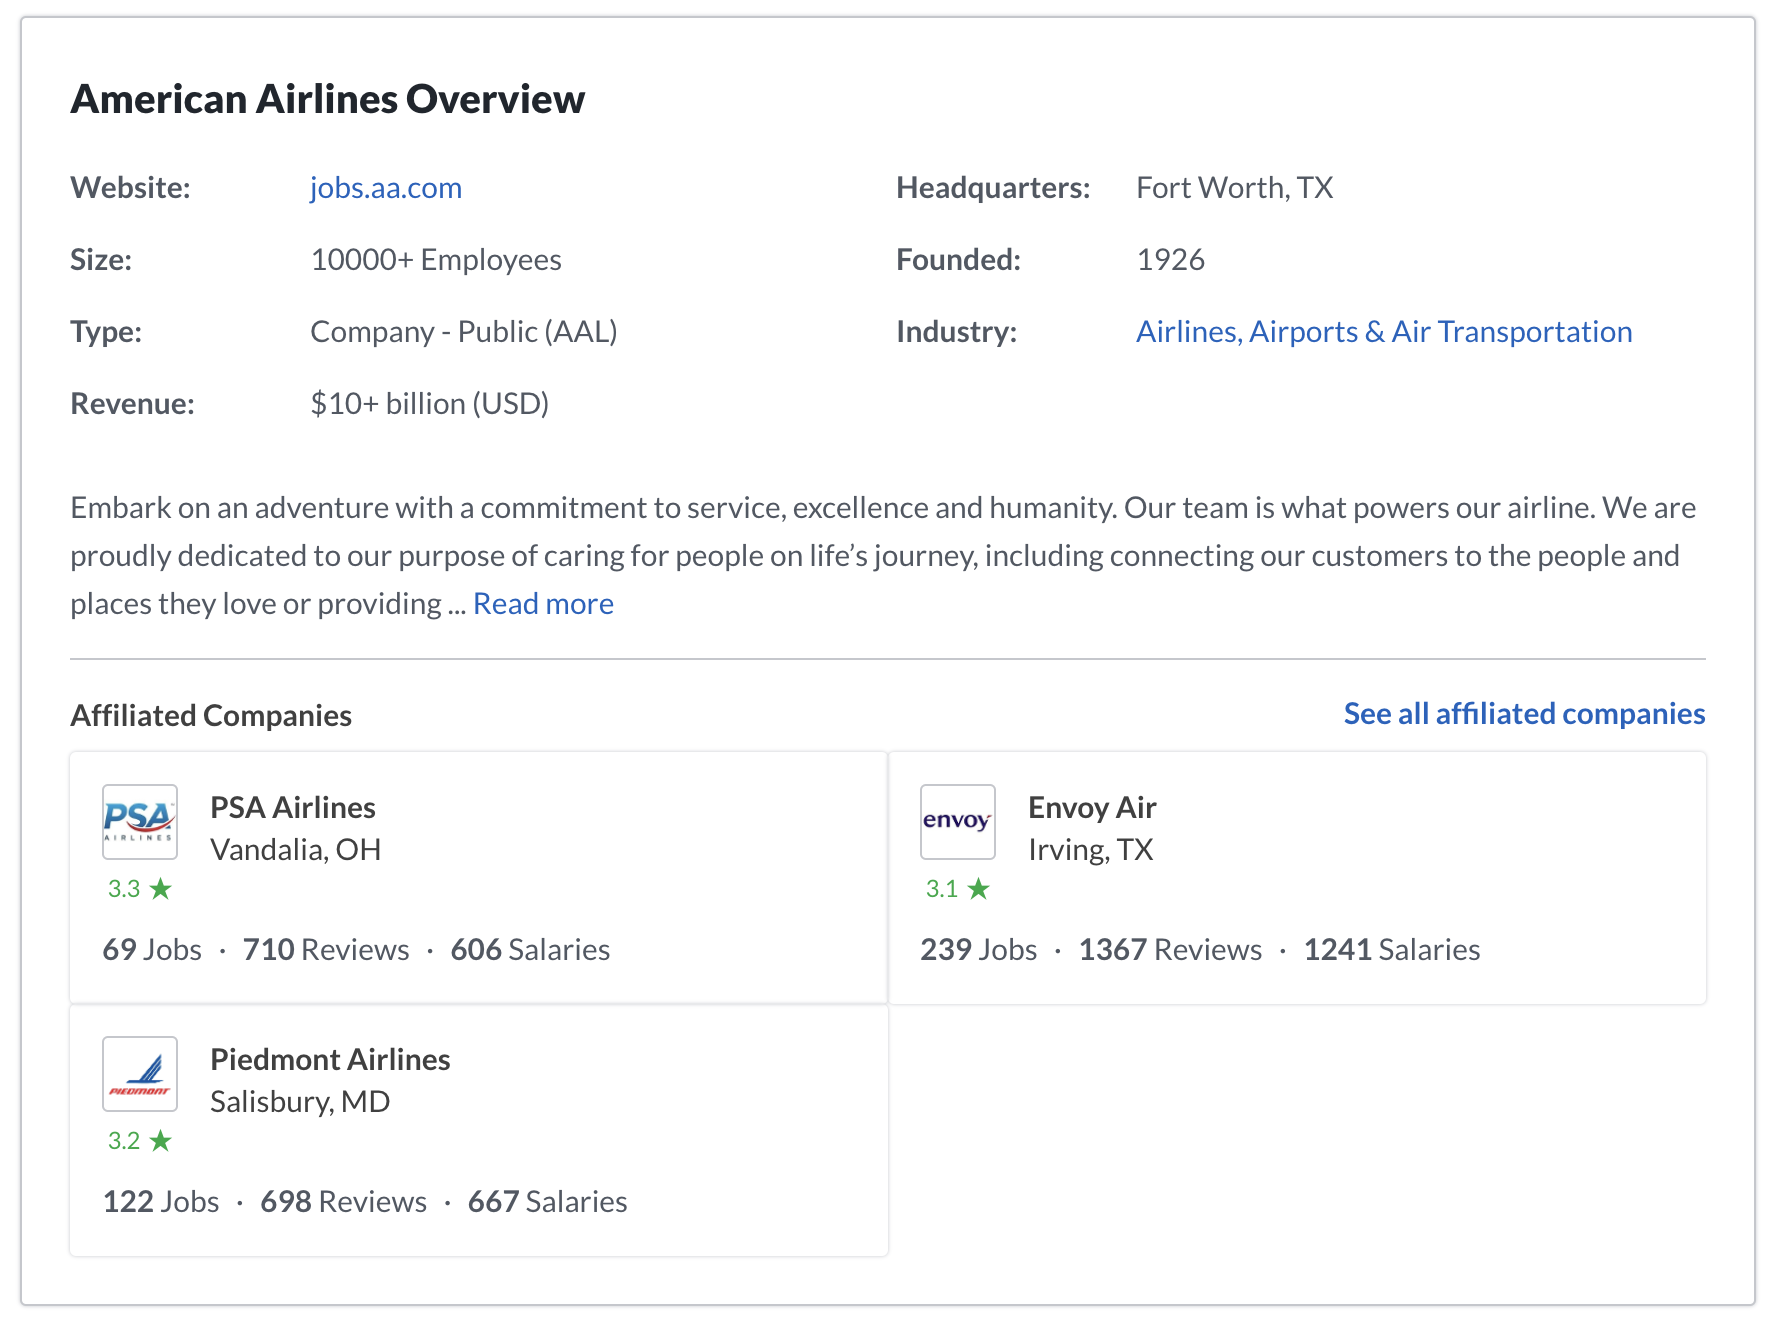

In [20]:
def scrape_overview(browser):
    # overview section
    overview = {}
    reviews = browser.find_element('id','EIOverviewContainer')
    # overview = reviews.find_elements_by_class_name('align-items-center')
    
    #website
    website = reviews.find_element('xpath',".//a[@data-test='employer-website']").text
    overview['website'] = website
    # headquarters
    headquarters =reviews.find_element('xpath',".//div[@data-test='employer-headquarters']").text
    overview['headquarters'] = headquarters
    # size
    size =reviews.find_element('xpath',".//div[@data-test='employer-size']").text
    overview['size'] = size
    # funded
    funded = reviews.find_element('xpath',".//div[@data-test='employer-founded']").text
    overview['funded'] = funded
    # type
    ctype = reviews.find_element('xpath',".//div[@data-test='employer-type']").text
    overview['ctype'] = ctype
    # industry
    industry = reviews.find_element('xpath',".//a[@data-test='employer-industry']").text
    overview['industry'] = industry
    # revenue
    revenue = reviews.find_element('xpath',".//div[@data-test='employer-revenue']").text
    overview['revenue'] = revenue
    # description
    try:
        reviews.find_element('xpath',".//span[@data-test='employerDescription']/button").click()
    except Exception:
        pass
    description = reviews.find_element('xpath',".//span[@data-test='employerDescription']").text
    overview['description'] = description
    # affiliated companies
    # employerHierarchies = reviews.find_element_by_xpath("//div[@data-test='employerHierarchies']")
    try:
        employerHierarchiesUrl = reviews.find_element('xpath',"//div[@data-test='employerHierarchies']/a").get_attribute('href')
        browser.get(employerHierarchiesUrl)
        affiliatedCompanies = browser.find_elements('xpath',"//a[@data-test='companyInfositeLink']")
        affiliatedAll = {}
        for i in range(len(affiliatedCompanies)):
            a = affiliatedCompanies[i]
            affiliated = {}
            affiliated['url'] = a.get_attribute('href')
            affiliated['companyName'] = a.find_element('xpath',".//h3[@data-test='employerName']").text
            affiliated['companyRating'] = a.find_element('xpath',".//p[@data-test='companyRating']").text
            affiliated['companyLocation'] = a.find_element('xpath',".//p[@data-test='companyLocation']").text
            affiliated['reviewsCount'] = a.find_element('xpath',".//p[@data-test='reviewsCount']").text
            affiliated['jobsCount'] = a.find_element('xpath',".//p[@data-test='jobsCount']").text
            affiliated['salariesCount'] = a.find_element('xpath',".//p[@data-test='salariesCount']").text
            
            affiliatedAll[i] = affiliated
        overview['affiliated'] = affiliatedAll
    except Exception:
        pass
    
    
    return overview

In [21]:
overview = scrape_overview(wd)

In [22]:
overview

{'website': 'jobs.aa.com',
 'headquarters': 'Fort Worth, TX',
 'size': '10000+ Employees',
 'funded': '1926',
 'ctype': 'Company - Public (AAL)',
 'industry': 'Airlines, Airports & Air Transportation',
 'revenue': '$10+ billion (USD)',
 'description': 'Embark on an adventure with a commitment to service, excellence and humanity. Our team is what powers our airline. We are proudly dedicated to our purpose of caring for people on life’s journey, including connecting our customers to the people and places they love or providing ... Read more',
 'affiliated': {0: {'url': 'https://www.glassdoor.com/Overview/Working-at-PSA-Airlines-EI_IE13689.11,23.htm',
   'companyName': 'PSA Airlines',
   'companyRating': '3.3★',
   'companyLocation': 'Vandalia, OH',
   'reviewsCount': '710',
   'jobsCount': '69',
   'salariesCount': '606'},
  1: {'url': 'https://www.glassdoor.com/Overview/Working-at-Envoy-Air-EI_IE807917.11,20.htm',
   'companyName': 'Envoy Air',
   'companyRating': '3.1★',
   'companyLoc

## scraping the links for reviews, jobs, salaries, interviews, benefits, photos sections
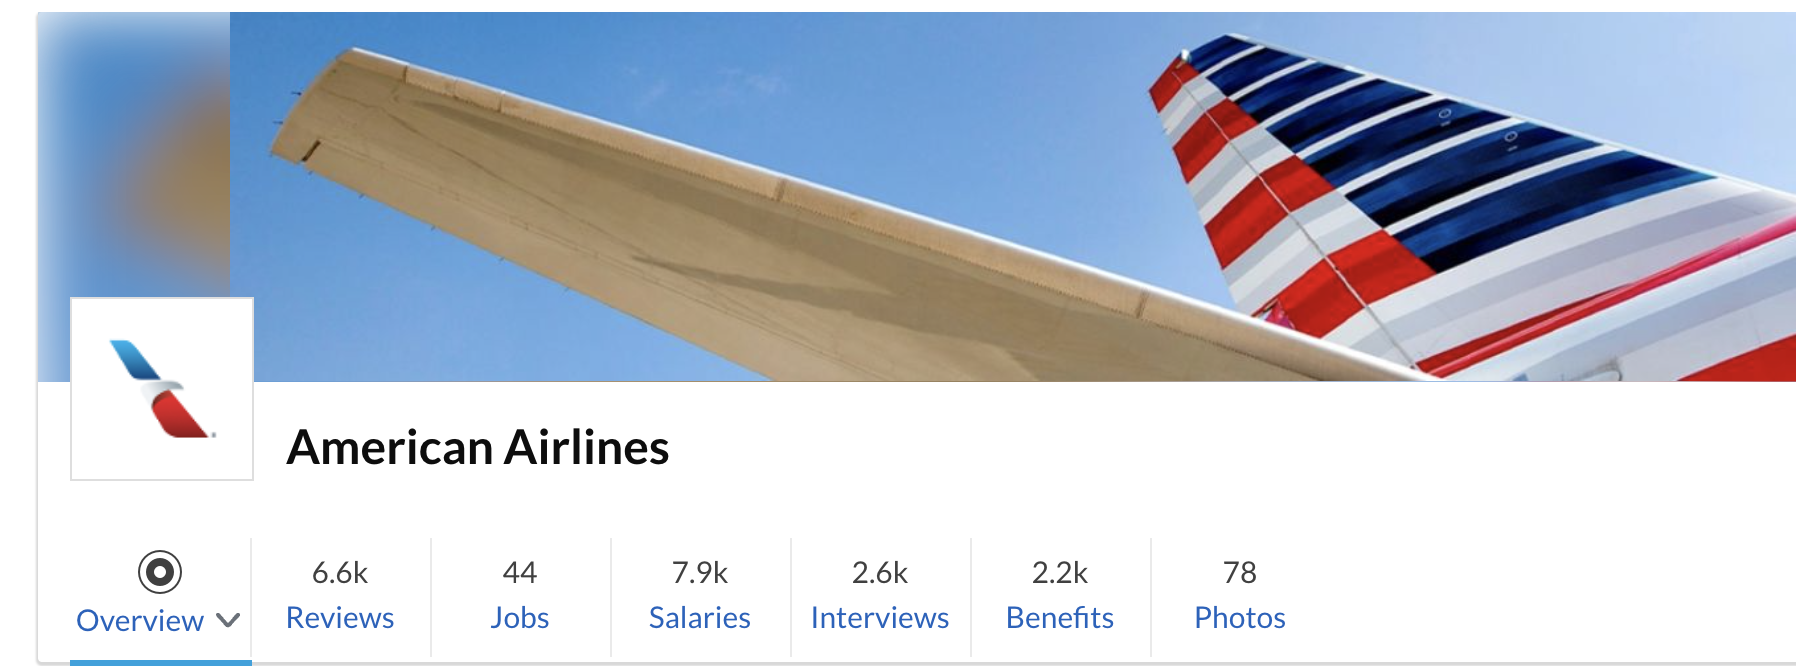

In [23]:
urlElements = wd.find_element('xpath',"//div[@id='SmarterNavContainer']")

In [29]:
overviewUrl = urlElements.find_elements(By.TAG_NAME,'a')[0].get_attribute('href')
reviewsUrl = urlElements.find_elements(By.TAG_NAME,'a')[1].get_attribute('href')
jobsUrl = urlElements.find_elements(By.TAG_NAME,'a')[2].get_attribute('href')
salariesUrl = urlElements.find_elements(By.TAG_NAME,'a')[3].get_attribute('href')
interviewsUrl = urlElements.find_elements(By.TAG_NAME,'a')[4].get_attribute('href')
benefitsUrl = urlElements.find_elements(By.TAG_NAME,'a')[5].get_attribute('href')
photosUrl = urlElements.find_elements(By.TAG_NAME,'a')[6].get_attribute('href')
faqUrl = urlElements.find_elements(By.TAG_NAME,'a')[7].get_attribute('href')
locationUrl = urlElements.find_elements(By.TAG_NAME,'a')[8].get_attribute('href')